In [2]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [4]:

!kaggle datasets download -d camnugent/california-housing-prices


Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0


In [5]:
import zipfile

with zipfile.ZipFile("california-housing-prices.zip", 'r') as zip_ref:
    zip_ref.extractall("california_housing_data")


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd

df = pd.read_csv("california_housing_data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [16]:
# Spliiting the data for training and testing so that i can work on the training dataset and 
# perform all the pre model development steps on this and then use
# testing data to evaluate the model




#Though i am not convinced by this approach but lets see

In [11]:
from sklearn.model_selection import train_test_split

X=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [20]:
#Notice how we didn't set a random state right now for our data 

In [34]:
train_data=X_train.join(y_train)

In [35]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19116,-122.65,38.23,52.0,1735.0,347.0,712.0,343.0,3.1711,<1H OCEAN,200800.0
2104,-119.77,36.75,44.0,1818.0,412.0,1680.0,418.0,1.7083,INLAND,48300.0
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY,360900.0
6010,-117.76,34.06,47.0,508.0,108.0,384.0,86.0,1.9583,INLAND,92600.0
9930,-122.33,38.29,14.0,3541.0,499.0,1577.0,459.0,5.3351,NEAR BAY,269900.0
...,...,...,...,...,...,...,...,...,...,...
8414,-118.35,33.94,42.0,1028.0,278.0,1369.0,261.0,3.3125,<1H OCEAN,144600.0
5574,-118.29,33.85,10.0,1391.0,420.0,1378.0,377.0,1.9049,<1H OCEAN,222200.0
17565,-121.90,37.32,48.0,1274.0,313.0,971.0,291.0,3.7738,<1H OCEAN,220600.0
849,-122.04,37.59,14.0,1727.0,302.0,1116.0,273.0,5.3428,NEAR BAY,243600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

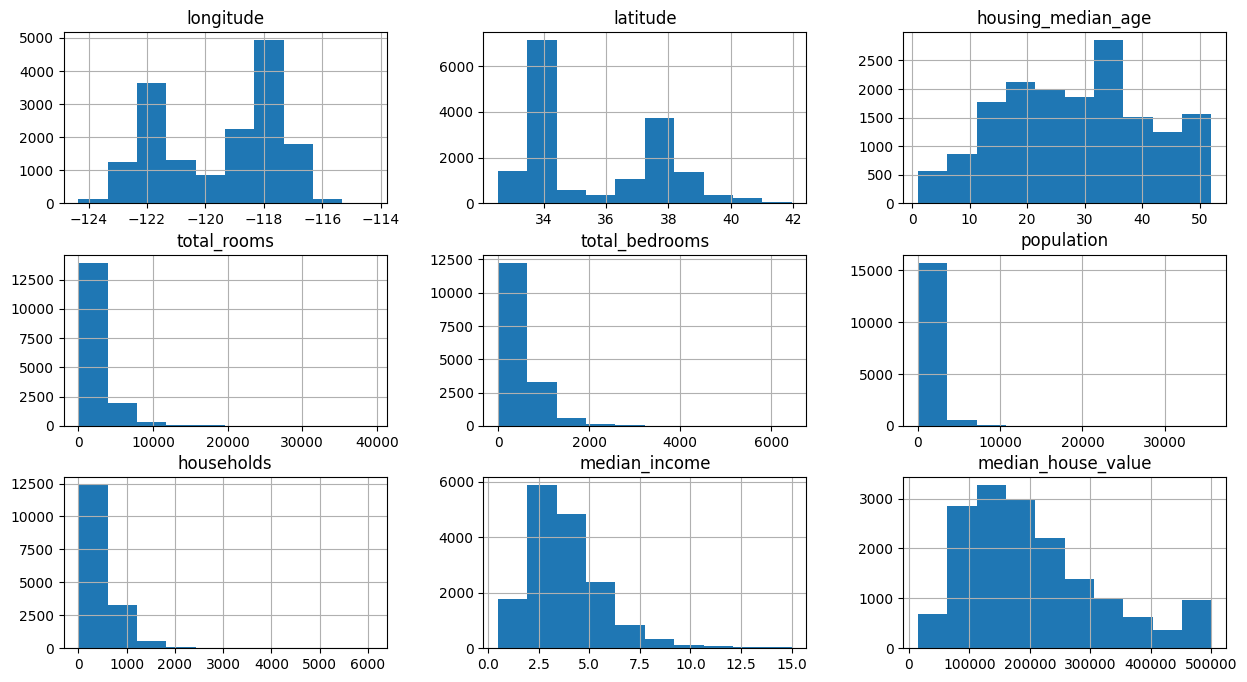

In [13]:
train_data.hist(figsize=(15,8))

<Axes: >

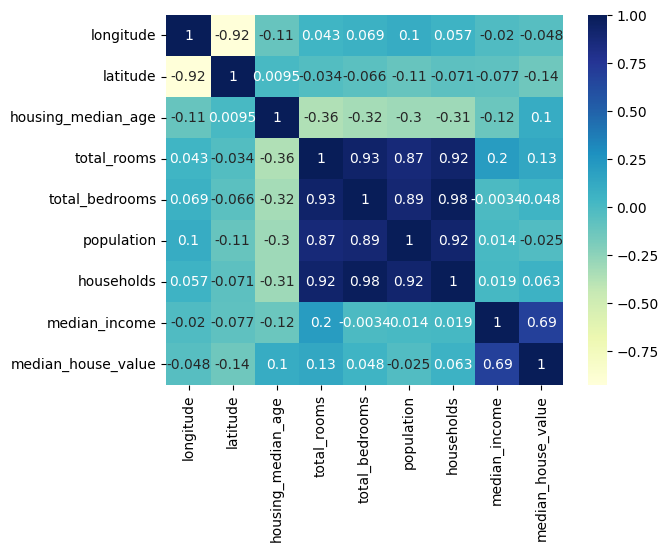

In [36]:
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [1]:
# As we saw in the histogram some of our features were right skewed (They should be called
# left skewed though.) SO we'll take the log of those features to fix that

In [37]:

train_data['total_rooms']=np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms'] + 1)
train_data['population']=np.log(train_data['population'] + 1)
train_data['households']=np.log(train_data['households']+ 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

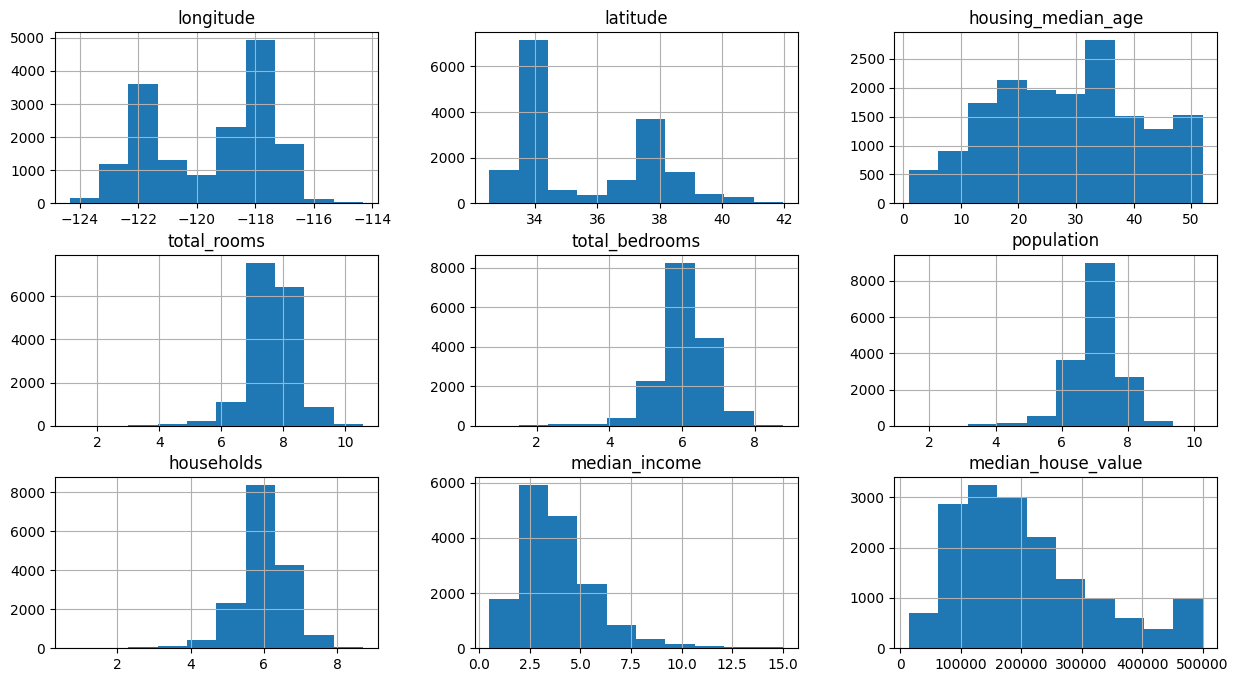

In [38]:
train_data.hist(figsize=(15,8))

In [17]:
#Now you can see the data is somewahr normally distributed or left skewed

In [17]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17357,-120.43,34.87,21.0,7.664816,5.799093,6.998510,5.869297,4.6648,<1H OCEAN,193000.0
1963,-120.58,38.77,15.0,7.676010,5.978886,6.754604,5.877736,4.0300,INLAND,141200.0
3551,-118.66,34.23,18.0,6.800170,4.962845,5.575949,4.709530,6.1288,<1H OCEAN,350000.0
9686,-121.62,36.71,24.0,8.341887,6.561031,7.696667,6.473891,4.3451,<1H OCEAN,177800.0
9322,-122.54,37.97,39.0,8.341410,6.637258,7.514255,6.603944,5.6263,NEAR BAY,352100.0


In [19]:
# we want to ocean proximity feature but we have to encode it to use it in our model

In [39]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7273
INLAND        5149
NEAR OCEAN    2109
NEAR BAY      1811
ISLAND           4
Name: count, dtype: int64

In [21]:
#Using pandas one hot encodng to encode the feature

In [40]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [41]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19116,-122.65,38.23,52.0,7.459339,5.852202,6.569481,5.840642,3.1711,200800.0,True,False,False,False,False
2104,-119.77,36.75,44.0,7.506042,6.023448,7.427144,6.037871,1.7083,48300.0,False,True,False,False,False
18304,-122.12,37.41,33.0,7.970049,6.426488,7.131699,6.366470,5.3727,360900.0,False,False,False,True,False
6010,-117.76,34.06,47.0,6.232448,4.691348,5.953243,4.465908,1.9583,92600.0,False,True,False,False,False
9930,-122.33,38.29,14.0,8.172447,6.214608,7.363914,6.131226,5.3351,269900.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,-118.35,33.94,42.0,6.936343,5.631212,7.222566,5.568345,3.3125,144600.0,True,False,False,False,False
5574,-118.29,33.85,10.0,7.238497,6.042633,7.229114,5.934894,1.9049,222200.0,True,False,False,False,False
17565,-121.90,37.32,48.0,7.150701,5.749393,6.879356,5.676754,3.7738,220600.0,True,False,False,False,False
849,-122.04,37.59,14.0,7.454720,5.713733,7.018402,5.613128,5.3428,243600.0,False,False,False,True,False


<Axes: >

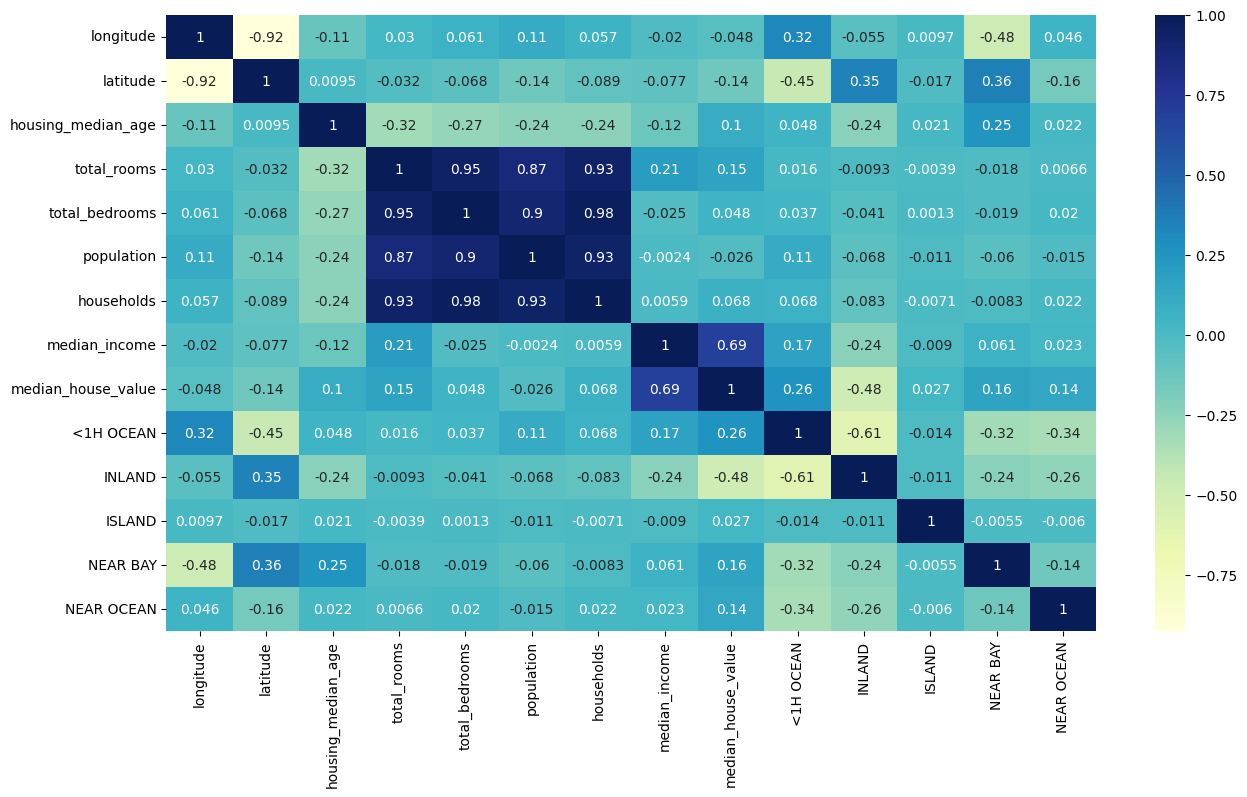

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

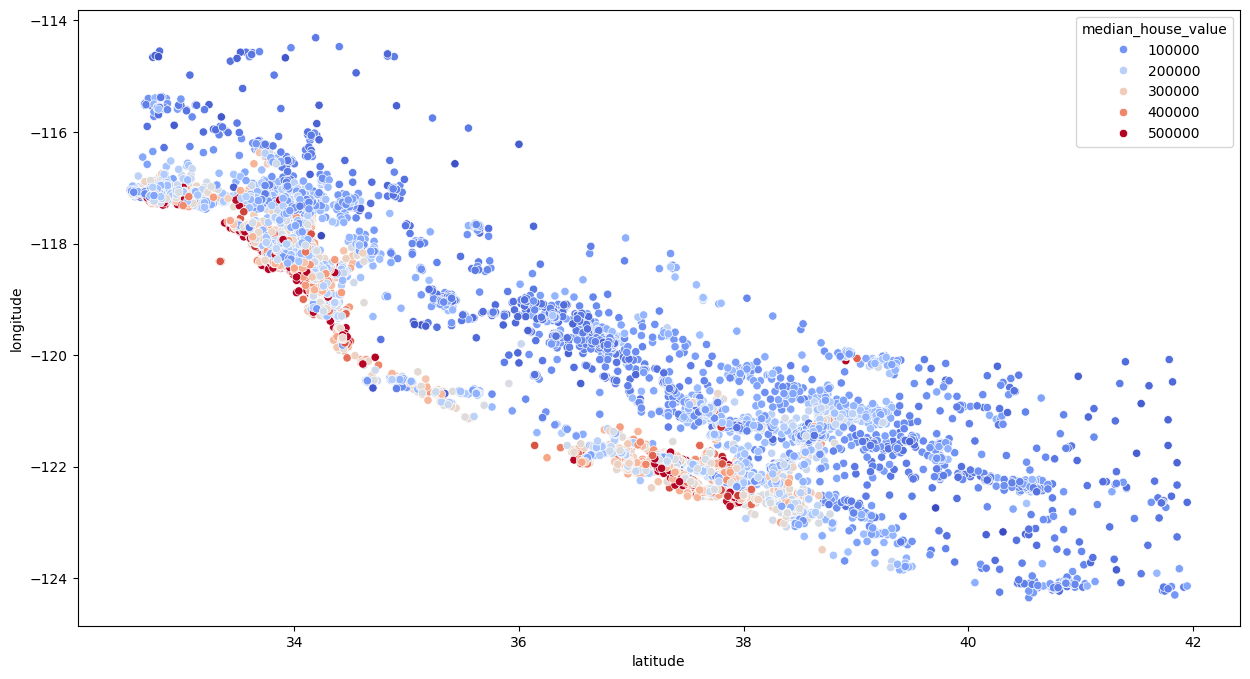

In [43]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')


**WE CAN SEE THAT THE HOUSES NEAR THE COAST i.e THE BOTTOM PART OF THE PLOT ARE MUCH EXPENSIVE THAN THOSE IN INLAND OR OTHERS**

In [44]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/ train_data['total_rooms']
train_data['per_household_rooms']=train_data['total_rooms']/train_data['households']

In [45]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,per_household_rooms
19116,-122.65,38.23,52.0,7.459339,5.852202,6.569481,5.840642,3.1711,200800.0,True,False,False,False,False,0.784547,1.277144
2104,-119.77,36.75,44.0,7.506042,6.023448,7.427144,6.037871,1.7083,48300.0,False,True,False,False,False,0.802480,1.243160
18304,-122.12,37.41,33.0,7.970049,6.426488,7.131699,6.366470,5.3727,360900.0,False,False,False,True,False,0.806330,1.251879
6010,-117.76,34.06,47.0,6.232448,4.691348,5.953243,4.465908,1.9583,92600.0,False,True,False,False,False,0.752730,1.395561
9930,-122.33,38.29,14.0,8.172447,6.214608,7.363914,6.131226,5.3351,269900.0,False,False,False,True,False,0.760434,1.332922


<Axes: >

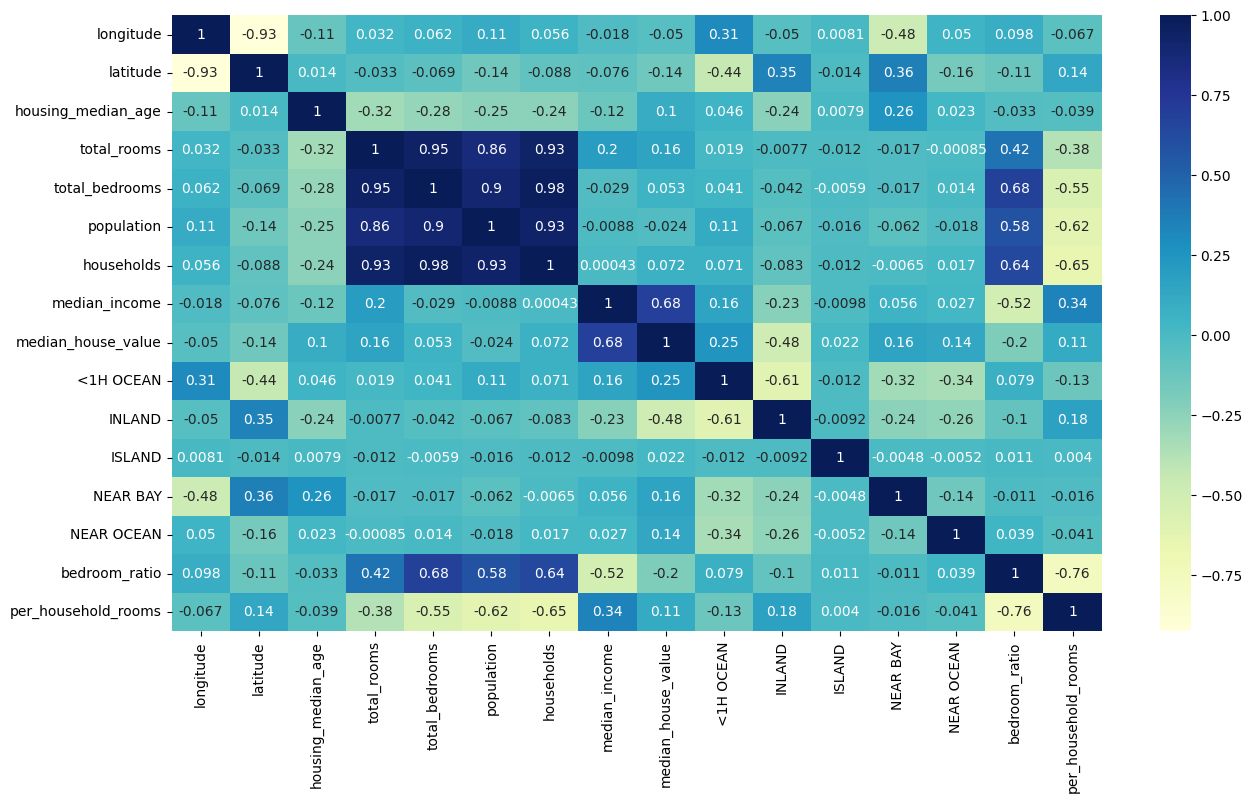

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [34]:
#We engineered two features and we can see that the household itself didnt have a much 
#siginifcant correlation with our target variable but per_househld_rooms have a somewhat
#useable(you can say) correlation with median_house_values(target variable)

**WHAT WE'VE DONE UPTIL NOW**


Explored the dataset

Fix Distribution of the data that was skewed

Encoded the only non-Numeric feature using one hot encoding

Explored some new faetures using feature engineering


**NOW WE HAVE MANY FEATURES WITH SIGNIFICANT CORRELATION WITH THE TARGET VARIABLE**

**My Insights uptil Now**

As we saw in the scatter plot the houses near the ocean (On the coast) have a high price and is a good predictor



# LINEAR REGRESSION MODEL

In [22]:
from sklearn.linear_model import LinearRegression

#### We shouldnt have split the data before just what i thought, So we'll do all the pre prcoessing we did on train data on test_data now

In [23]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler=StandardScaler()
X_train, y_train=train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s= scaler.fit_transform(X_train)

In [47]:
reg=LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [48]:
test_data=X_test.join(y_test)

In [49]:
test_data['total_rooms']=np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms'] + 1)
test_data['population']=np.log(test_data['population'] + 1)
test_data['households']=np.log(test_data['households']+ 1)

In [50]:
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [51]:
test_data['bedroom_ratio']=test_data['total_bedrooms']/ test_data['total_rooms']
test_data['per_household_rooms']=test_data['total_rooms']/test_data['households']

In [52]:
X_test, y_test=test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [53]:
X_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'bedroom_ratio', 'per_household_rooms'],
      dtype='object')

In [54]:
X_test_s=scaler.transform(X_test)
#If this line ever throws an error make sure that where the data is splitted for train and test
#after that in ocean proximity island have value less than 5 kiu ke total hi 5 island ki entries hain
#agar 5/5 train mei chaley gaye tou test mei 0 entries means island ka feature hi nahi tou wo error dega

In [44]:
reg.score(X_test_s, y_test)

0.6840510851445012

# Random Forest Regressor Model

In [55]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [56]:
forest.score(X_test_s, y_test)

0.8255071378045629

In [50]:
#from sklearn.model_selection import GridSearchCV
#learn grid search

## Save Models and Pre processing in a pipeline

In [1]:
import joblib

In [2]:
from sklearn.pipeline import Pipeline

In [3]:
# Recreate preprocessing + model as a pipeline for each model

In [57]:
features=X_train.columns.tolist()

In [58]:
#LInear Regression Pipeline

#linear_pipeline=Pipeline([('scaler',scaler), ('model',reg) ])

**we'll not use the linear_pipeline as forest model has much better r^2 or score than linear regression model**

In [60]:
forest_pipeline=Pipeline([ ('scaler',scaler) , ('model',forest) ])

In [61]:
#Save pipelines
#joblib.dump(linear_pipeline, 'linear_pipeline.pkl')
joblib.dump(forest_pipeline, 'forest_pipeline.pkl')

['forest_pipeline.pkl']

In [62]:
#Save the feature names for input order
joblib.dump(X_train.columns.tolist(), 'features.pkl')

['features.pkl']

In [63]:
df.to_csv("processed_CaliforniaHousingData.csv", index=False)